In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# we generated multiple versions of each dataset (same size, dimensions and
# density) but different cells filled and values.
# here we are getting the average.
df_1 = pd.read_csv('testresults_1.csv')
df_2 = pd.read_csv('testresults_2.csv')
# df_3 = pd.read_csv('testresults_3.csv')

concat_df = pd.concat([df_1, df_2])

df = concat_df.groupby(concat_df.columns.difference(['time'])).mean().reset_index()

# let's get total cells and also classify datasets based on their ratio
df['total_cells'] = df.num_rows * df.num_cols
df['total_cells'] = pd.to_numeric(df['total_cells'])

def determine_shape(row):
    if row['num_rows'] == row['num_cols']:
        return 'square'
    elif row['num_cols'] > row['num_rows']:
        return 'wide'
    else:
        return 'tall'
    
df['sshape'] = df.apply(determine_shape, axis=1)

In [156]:
df.sample(10)

,implementation,action,num_rows,num_cols,filled,time,total_cells,sshape
999,array,insert: row into middle,100,1,0.33,0.000584,100,tall
683,csr,insert: col after end,1000,1000,1.00,0.000011,1000000,square
668,csr,insert: row after end,1000,1000,1.00,0.000008,1000000,square
21,array,find: non-existing value,316,316,0.66,0.172092,99856,square
619,linked_list,insert: col at end,3160,31,0.66,0.151795,97960,tall
1536,array,insert: row after end,10,10,1.00,0.000007,100,square
516,array,insert: row after end,1,100,1.00,0.000005,100,wide
1340,csr,insert: col at end,320,3,0.66,0.000957,960,tall
398,csr,insert: row after end,3,320,0.66,0.000009,960,wide
115,linked_list,find: existing value,32,32,0.66,0.000101,1024,square


In [157]:
# figure params
colors = {'array': '#0c101c', 'linked_list': '#ec4700', 'csr': '#15c2a5', 'default': '#999999'}
linestyles = {0.33: 'dotted', 0.66: 'dashed', 1.0: 'solid'}
alphas = {0.33: 1, 0.66: 0.5, 1.0: 0.5}

# fc_dpi = 300
mm_figsize = (24, 8)

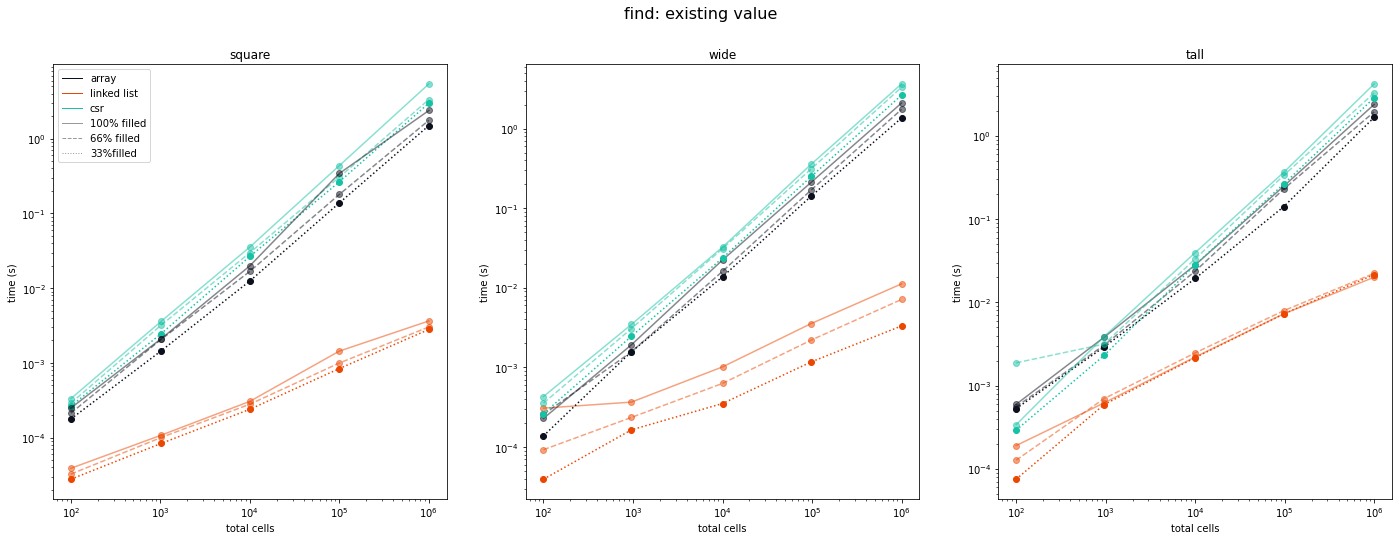

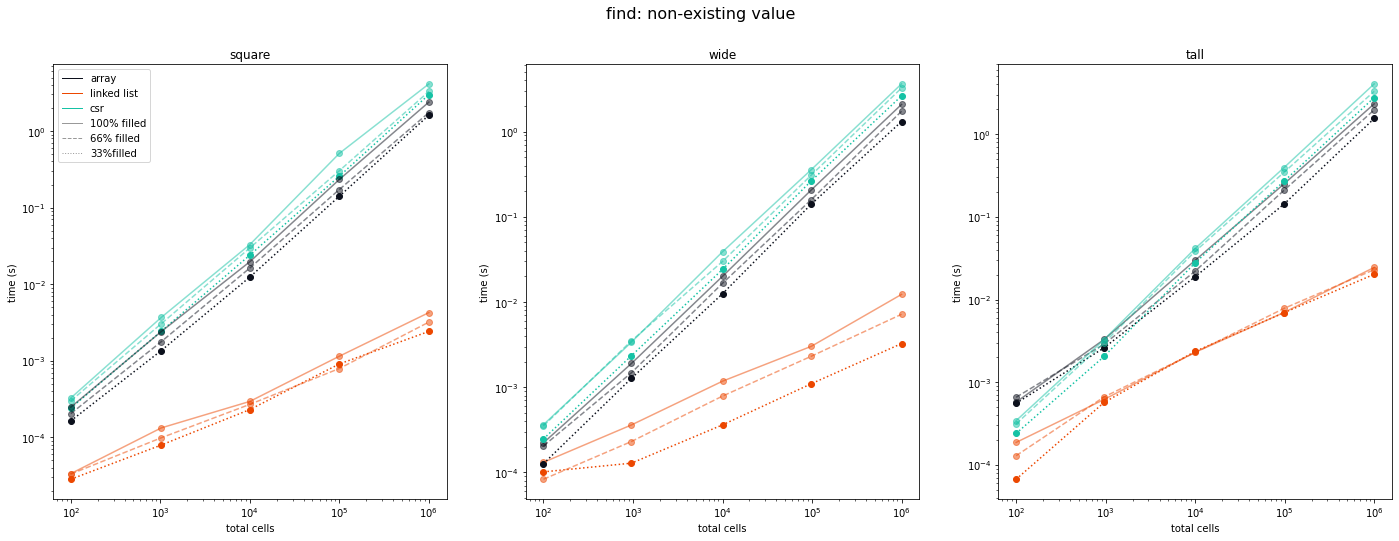

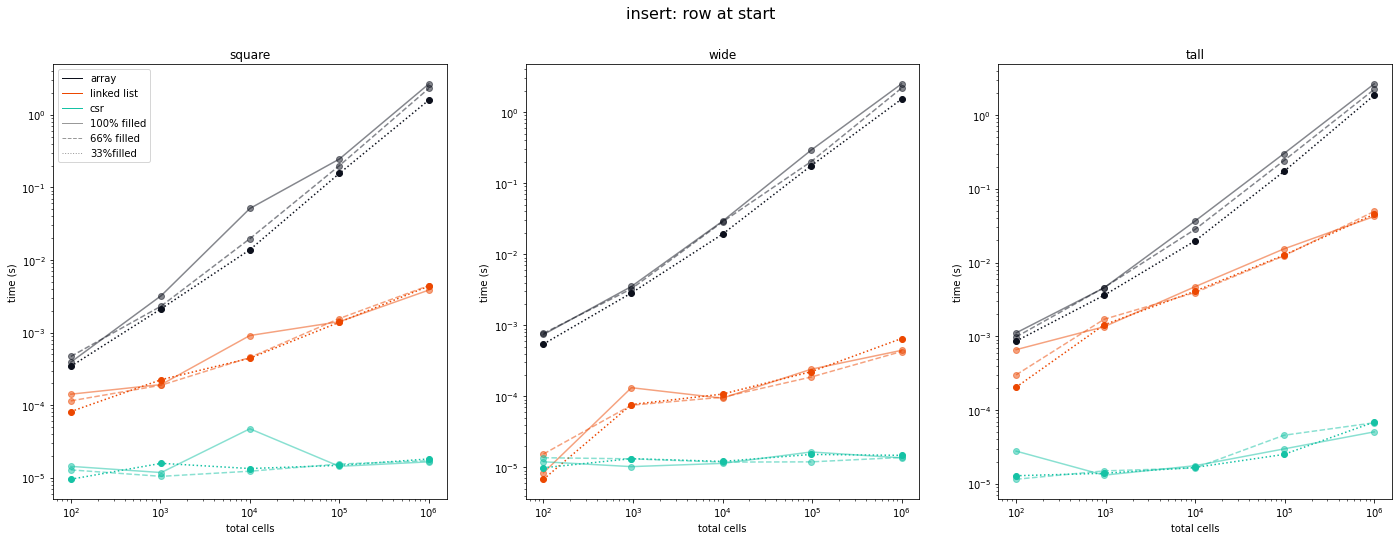

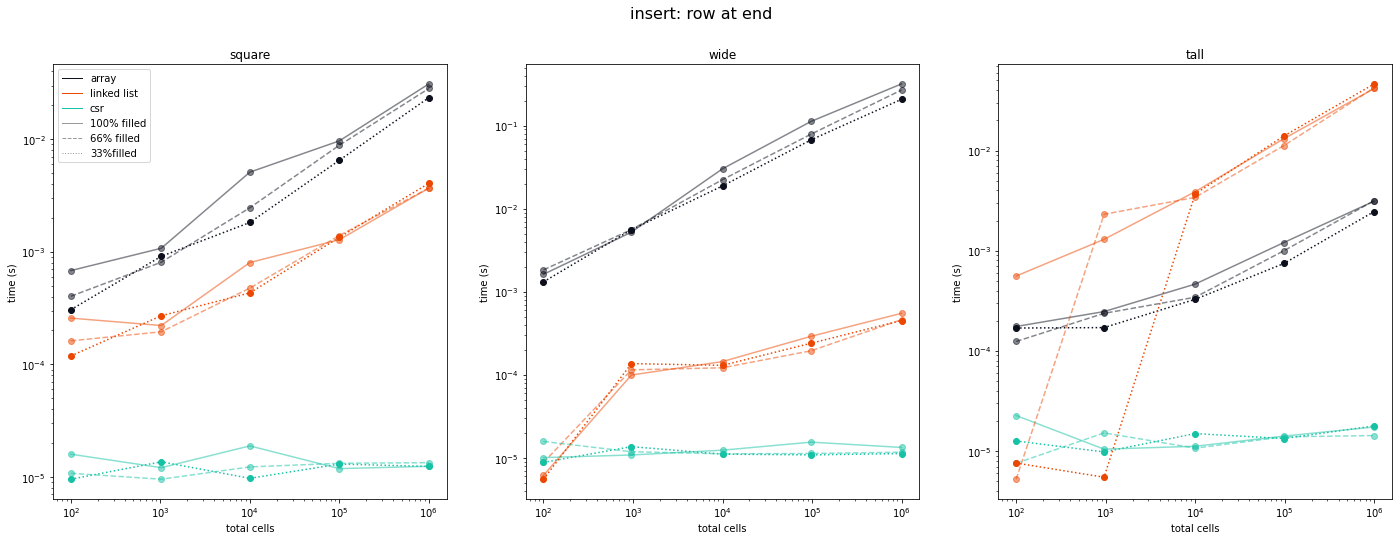

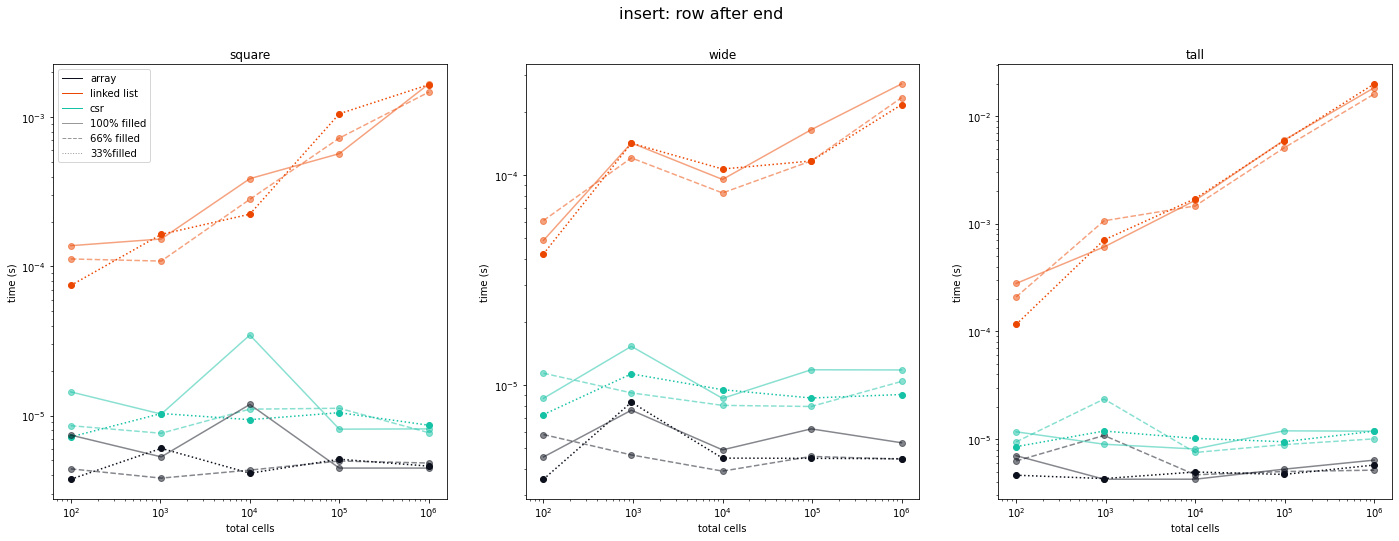

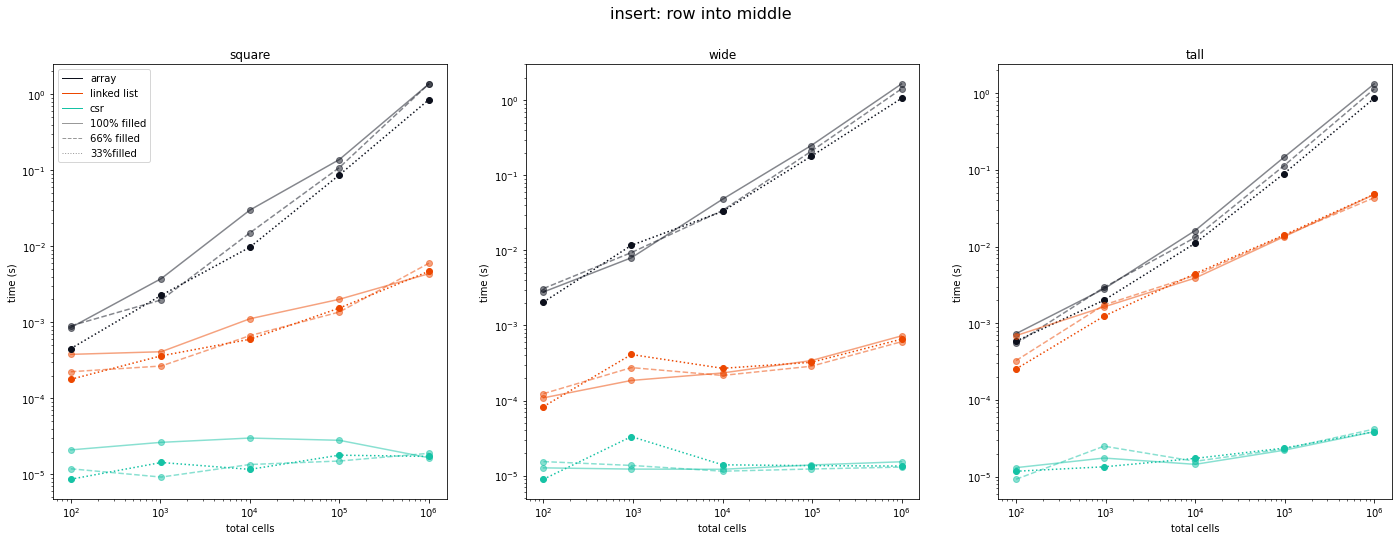

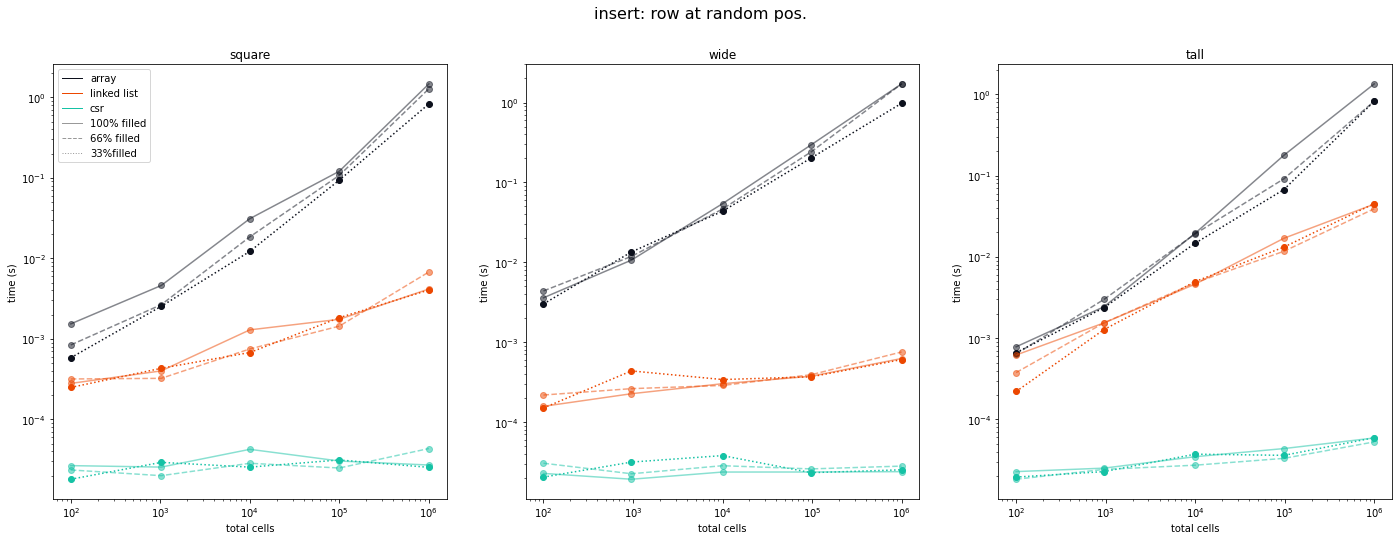

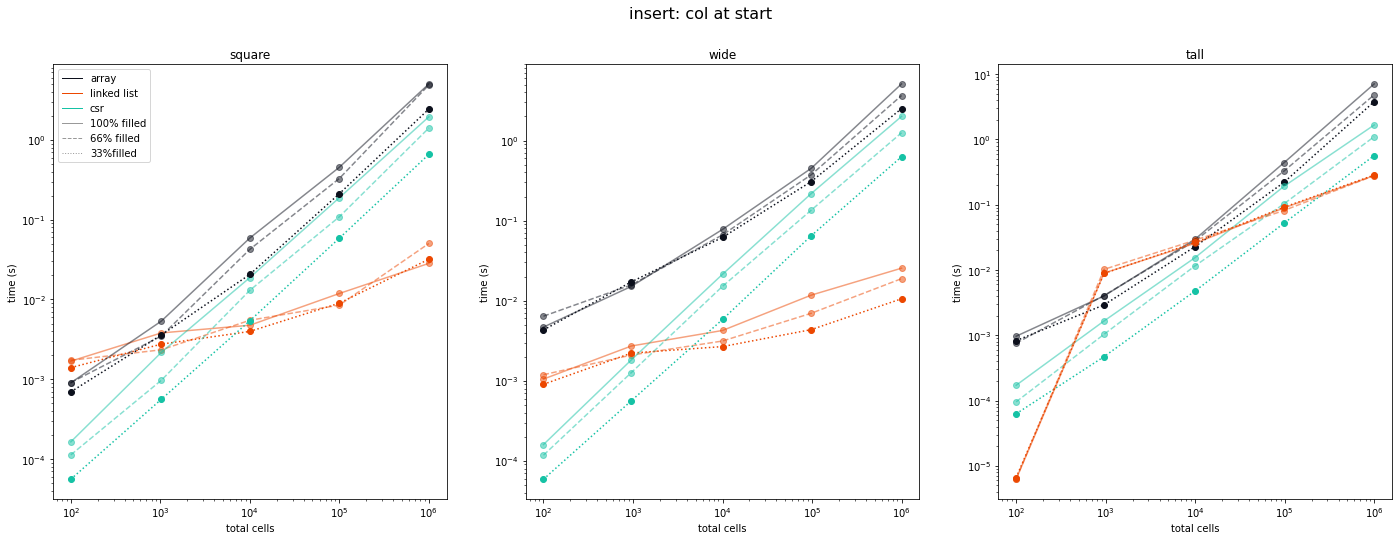

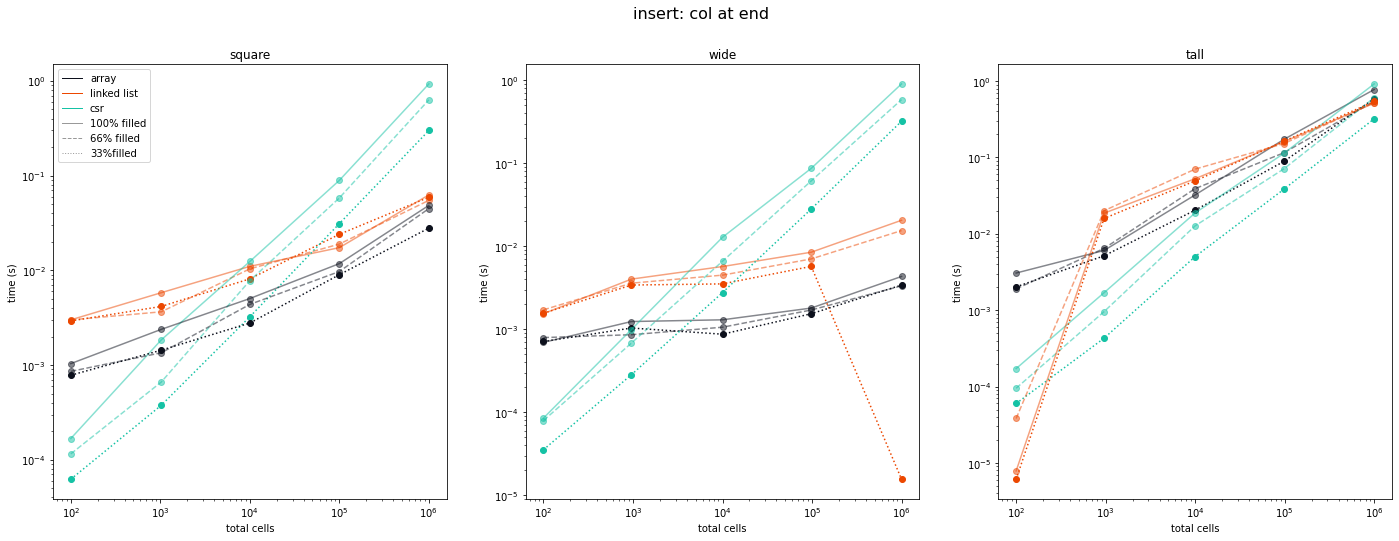

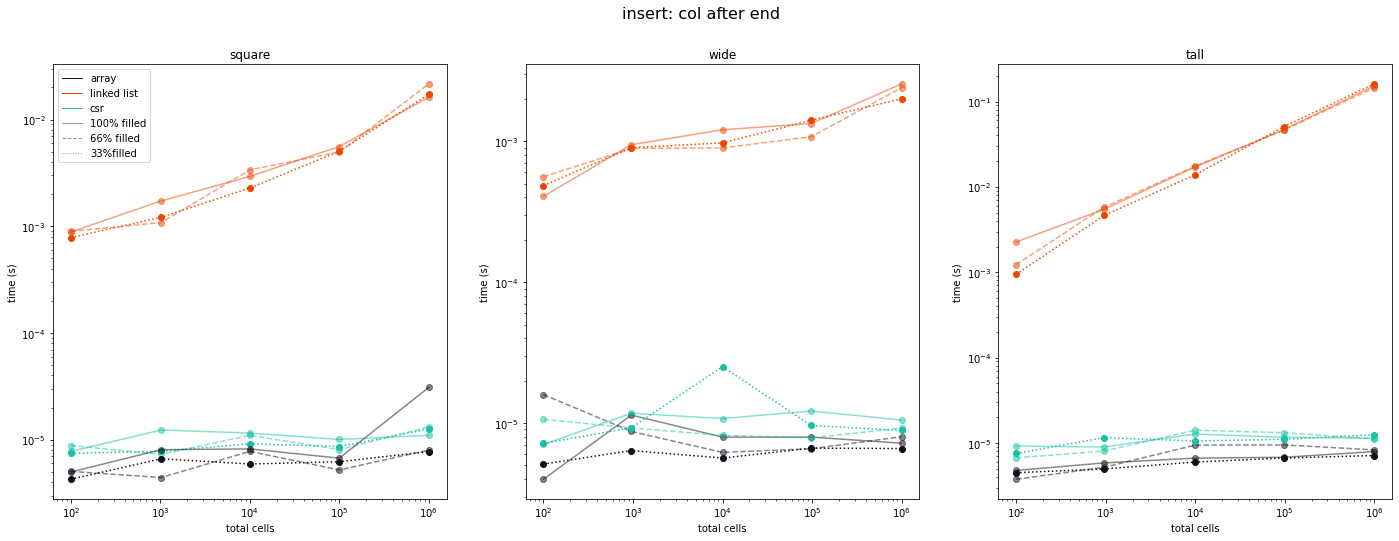

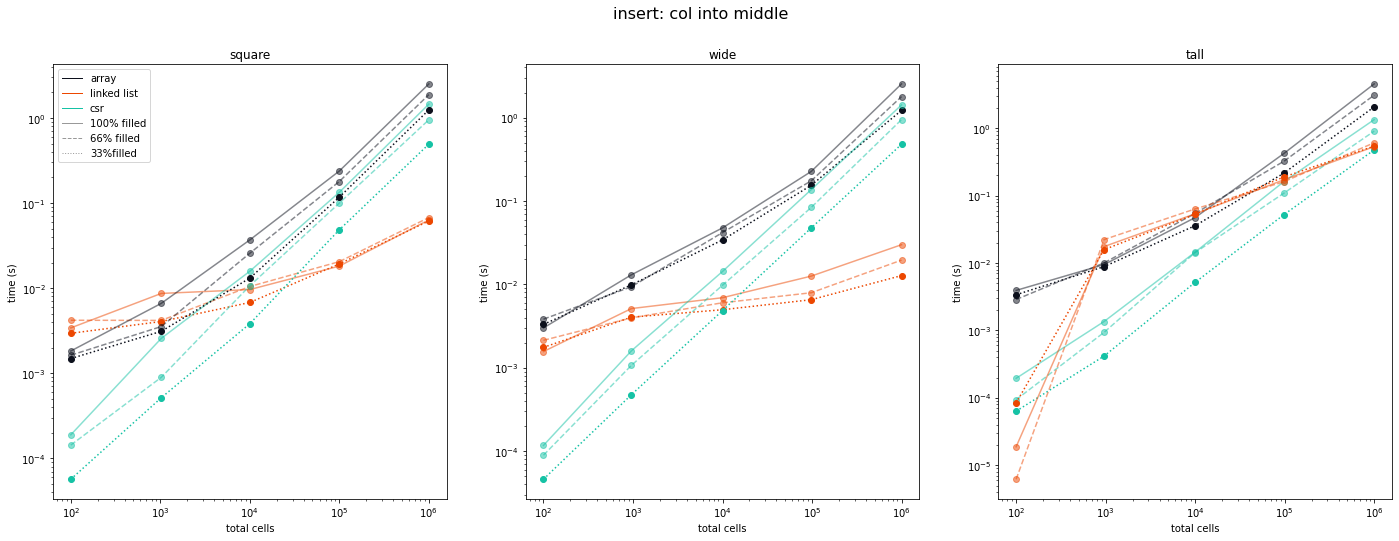

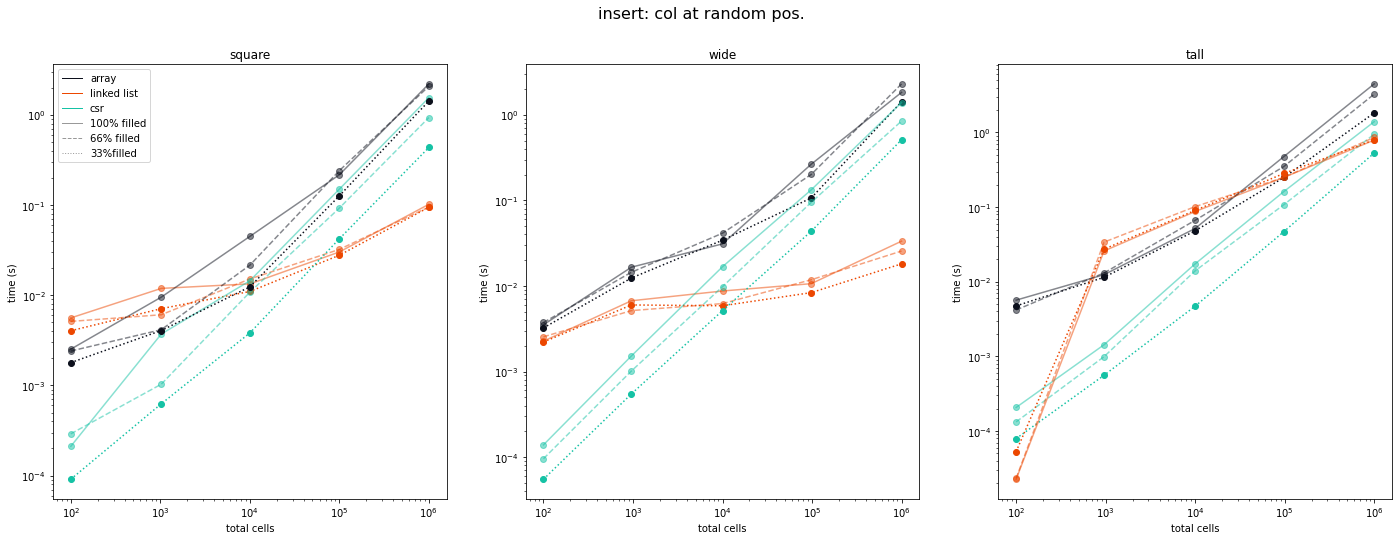

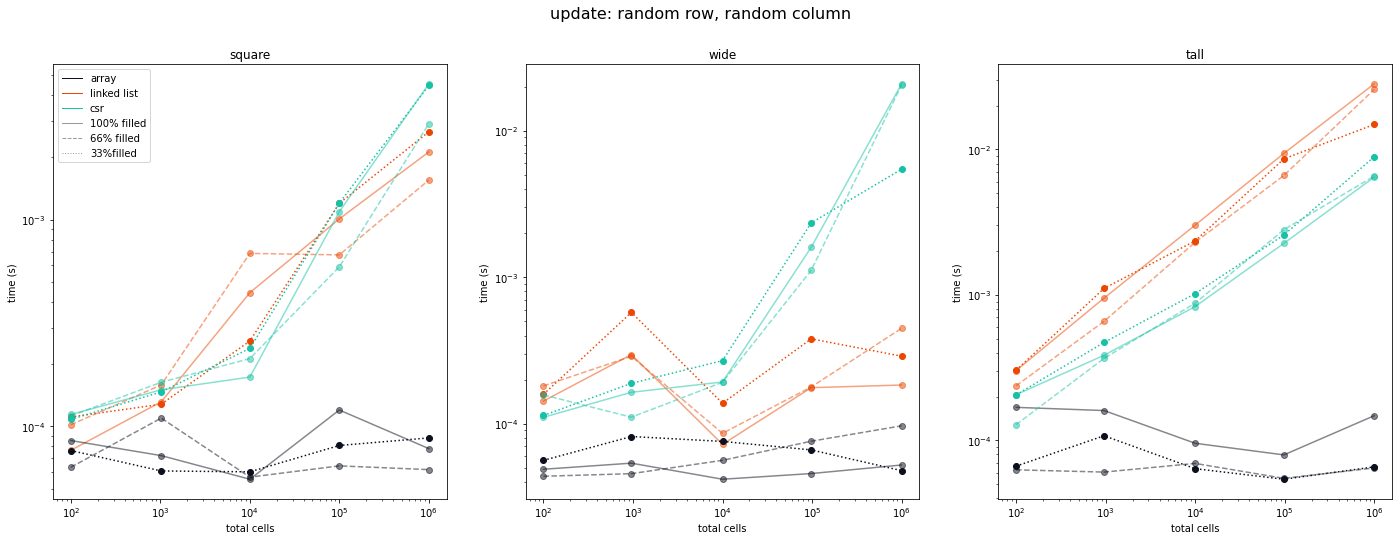

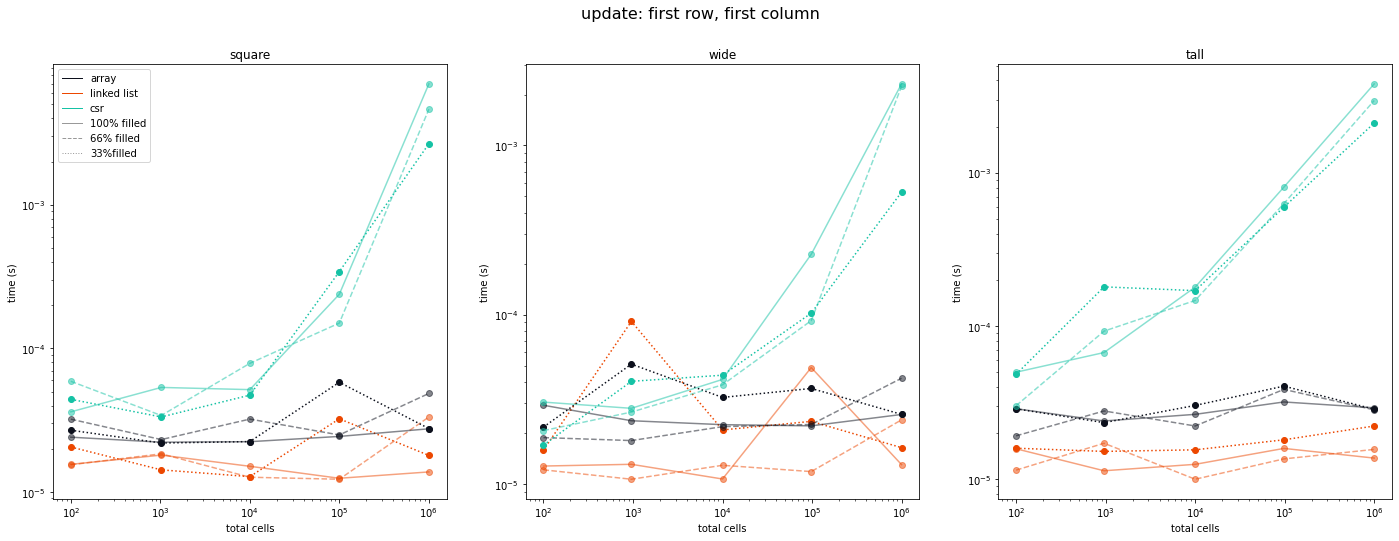

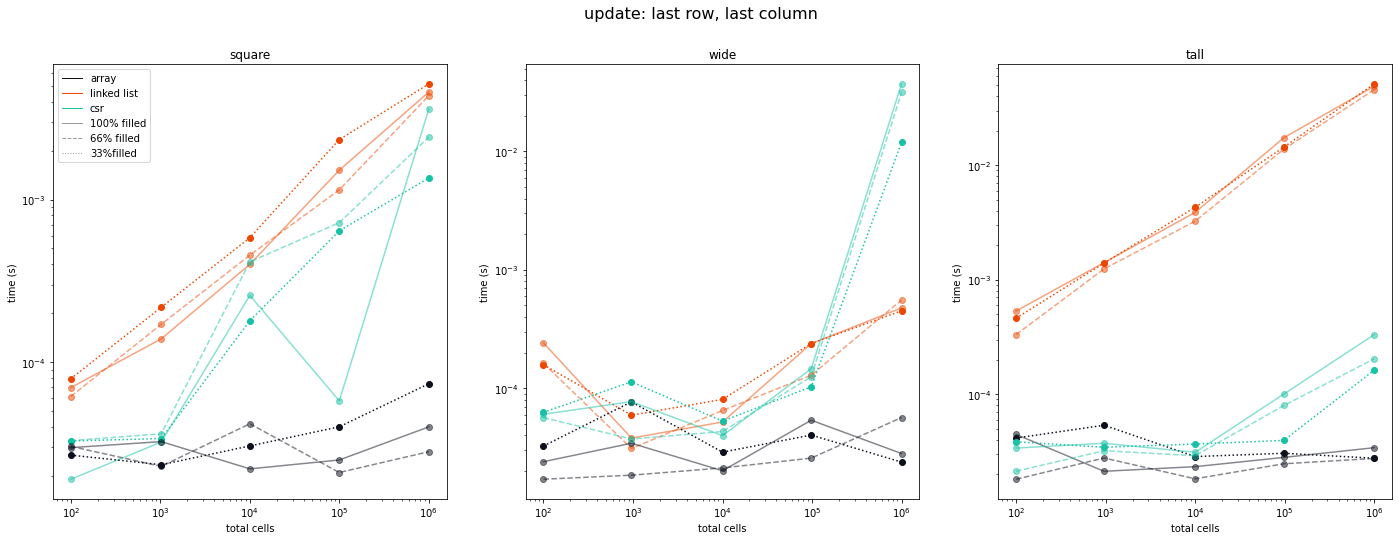

In [158]:
operation_names = df.action.unique()        # get list of operations

# op = 'find: existing value'

def label_endpoints(axs, i, shape_df):
    axs[i].set_xlim(1, np.log10(1500000))
    x_start = np.log10(1000000)
    x_end   = np.log10(1100000)
    PAD = 0.1

    max_time = shape_df['time'].max()
    shape_df = shape_df.sort_values(by=['time'])

    label_ordering = shape_df[shape_df['total_cells'] == 1000000].sort_values('time', ascending=True)
    
    for idx, implementation in enumerate(label_ordering['implementation'].unique()):
        for idx2, filled in enumerate(label_ordering['filled'].unique()):
            data = shape_df[(shape_df['implementation'] == implementation) & (shape_df['filled'] == filled) & (shape_df['total_cells'] == 1000000)]
            color = colors[implementation]
            
            # label
            text = '' + str(int(100 * filled)) + '% ' + implementation
            
            # vertical start of line
            y_start = np.log10( data['time'].values[0])
            # vertical end of line
            y_end = np.log10((max_time / 9) * (idx * 3 + idx2) + (max_time / 18))
            
            # Add line based on three points
            axs[i].plot(
                [x_start, (x_start + x_end - PAD) / 2 , x_end - PAD], 
                [y_start, y_end, y_end], 
                color=color, 
                alpha=0.5, 
                ls="dotted"
            )
            
            axs[i].text(
                x_end, 
                y_end, 
                text, 
                color=color, 
                fontsize=12, 
                # weight="bold", 
                fontfamily="Helvetica", 
                va="center"
            )

for op in operation_names:
    op_df = df[df.action == op]
    op_df = op_df.sort_values('total_cells')

    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=mm_figsize)

    # square
    # --------------------------------------------------------------------------
    shape_df = op_df[op_df.sshape == 'square']

    for implementation in shape_df['implementation'].unique():
        for filled in shape_df['filled'].unique():
            data = shape_df[(shape_df['implementation'] == implementation) & (shape_df['filled'] == filled)]
            label = f"{implementation} ({filled})"
            color = colors[implementation]
            alpha = alphas[filled]
            linestyle = linestyles[filled]
            axs[0].plot(data['total_cells'], data['time'], marker='.', markersize=12, label=label, color=color, linestyle=linestyle, alpha=alpha)

    # label_endpoints(axs, 0, shape_df)

    # wide
    # --------------------------------------------------------------------------
    shape_df = op_df[op_df.sshape == 'wide']

    for implementation in shape_df['implementation'].unique():
        for filled in shape_df['filled'].unique():
            data = shape_df[(shape_df['implementation'] == implementation) & (shape_df['filled'] == filled)]
            label = f"{implementation} ({filled})"
            color = colors[implementation]
            alpha = alphas[filled]
            linestyle = linestyles[filled]
            axs[1].plot(data['total_cells'], data['time'], marker='.', markersize=12, label=label, color=color, linestyle=linestyle, alpha=alpha)

    # label_endpoints(axs, 0, shape_df)

    # tall
    # --------------------------------------------------------------------------
    shape_df = op_df[op_df.sshape == 'tall']

    for implementation in shape_df['implementation'].unique():
        for filled in shape_df['filled'].unique():
            data = shape_df[(shape_df['implementation'] == implementation) & (shape_df['filled'] == filled)]
            label = f"{implementation} ({filled})"
            color = colors[implementation]
            alpha = alphas[filled]
            linestyle = linestyles[filled]
            axs[2].plot(data['total_cells'], data['time'], marker='.', markersize=12, label=label, color=color, linestyle=linestyle, alpha=alpha)

    # label_endpoints(axs, 0, shape_df)

    # Set axis labels and legend
    for ax in axs:
        ax.set_xlabel('total cells')
        ax.set_ylabel('time (s)')
        ax.set_xscale('log')
        ax.set_yscale('log')

    # set titles
    axs[0].set_title('square')
    axs[1].set_title('wide')
    axs[2].set_title('tall')
    fig.suptitle(op, fontsize=16)

    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color=colors['array'], lw=1),
                    Line2D([0], [0], color=colors['linked_list'], lw=1),
                    Line2D([0], [0], color=colors['csr'], lw=1),
                    Line2D([0], [0], color=colors['default'], lw=1, linestyle='solid'),
                    Line2D([0], [0], color=colors['default'], lw=1, linestyle='dashed'),
                    Line2D([0], [0], color=colors['default'], lw=1, linestyle='dotted')]

    # lines = ax.plot(data)
    axs[0].legend(custom_lines, ['array', 'linked list', 'csr', '100% filled', '66% filled', '33%filled'])
        
    op = op.replace(':','')
    plt.savefig(f"graphs/{op}.jpg", bbox_inches='tight', dpi=300)

    # Show the plot
    plt.show()
    